In [ ]:
import osmnx as ox

# get the street network for Boston
G = ox.graph_from_place('Boston, Massachusetts, USA', network_type='drive')

C:\Users\sulli\AppData\Local\Temp\ipykernel_9208\2393019726.py:37: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = matplotlib.cm.get_cmap('viridis')


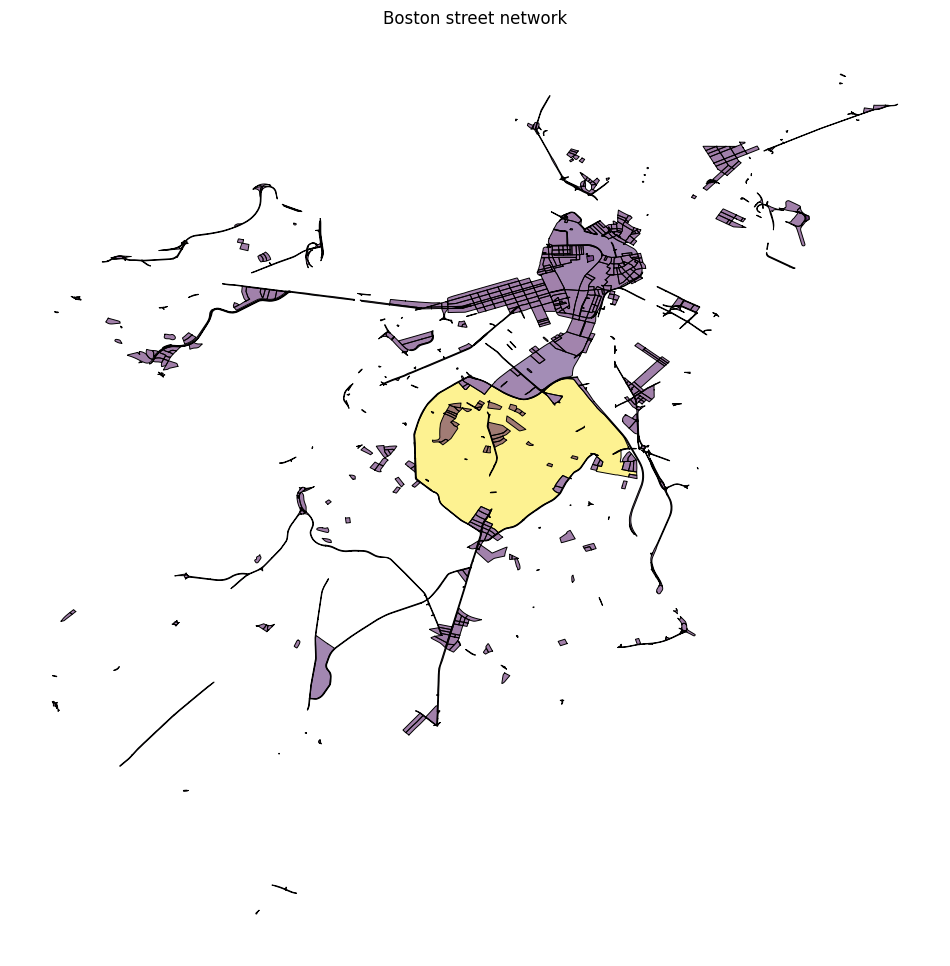

In [6]:
import geopandas as gpd
from shapely.geometry import LineString
from shapely.ops import polygonize
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib


edges = ox.graph_to_gdfs(G, nodes=False, edges=True)

lines = []
for geom in edges.geometry:
    if geom.geom_type == 'LineString':
        lines.append(geom)
    elif geom.geom_type == 'MultiLineString':
        for g in geom:
            lines.append(g)

# Now polygonize
polygons = list(polygonize(lines))

block_area = [polygon.area for polygon in polygons]
block_perimeter = [polygon.length for polygon in polygons]

# plot only the edges of the street network
fig, ax = plt.subplots()
for polygon in polygons:
    x, y = polygon.exterior.xy
    ax.plot(x, y, color='#000000', linewidth=0.7)
ax.set_title('Boston street network')
ax.set_axis_off()

# make plot big enough to be a full screen image
fig.set_size_inches(12, 12)

# now on top of that, plot the polygons, with color intensity based on block area, keeping polygons semi-transparent
cmap = matplotlib.cm.get_cmap('viridis')
norm = matplotlib.colors.Normalize(vmin=min(block_area), vmax=max(block_area))
for i, polygon in enumerate(polygons):
    x, y = polygon.exterior.xy
    ax.fill(x, y, facecolor=cmap(norm(block_area[i])), edgecolor='none', alpha=0.5)
    
plt.show()







